In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

#zadanie1
print(data.head(8))
print(" ")
print(data.describe())

   Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
5      8.3829  11.8860
6      7.4764   4.3483
7      8.5781  12.0000
 
       Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000


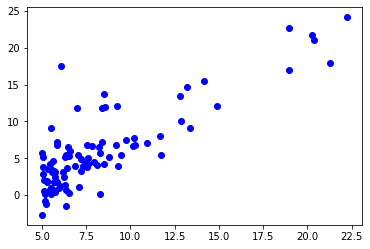

In [172]:
#zadanie2
x = data.values[:, 0]
y = data.values[:, 1]
plt.plot(x, y, 'bo')

In [173]:
#zadanie5
def h(X, theta):
  return theta.T@X


def computeCost(X, y, theta):
  return ((h(X,theta)-y)**2).sum()/2/X.shape[1]


def simple_gradient(X, y, theta_new, alpha, it):
  theta_temp = theta_new.copy()
  cost = []
  theta_new = theta_new.copy()
  for i in range (it):
    theta_temp[0] = theta_new[0] - (alpha/X.shape[1])*(h(X,theta_new)-y).sum()
    theta_temp[1] = theta_new[1] - (alpha/X.shape[1])*(h(X,theta_new)@X[1]-y@X[1]).sum()
    theta_new = theta_temp
    cost.append(computeCost(X, y, theta_temp))

  return theta_temp, cost



In [174]:
#zadanie3, 4
X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)
y.shape = [1, y.shape[0]]
theta1 = np.zeros((X.shape[0], 1), dtype=np.float32)

#zadanie6
print("Funkcja kosztów:",computeCost(X,y,theta1))
alpha = 0.01
it = 1500
th, cost = simple_gradient(X, y, theta1, alpha, it)
print("Optimal parameters:",th)


Funkcja kosztów: 32.072733877455676
Optimal parameters: [[-3.6360953]
 [ 1.1669923]]


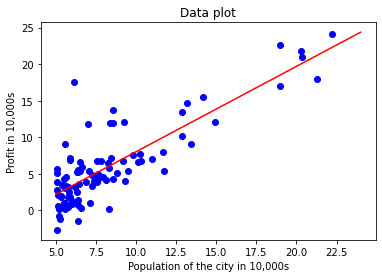

In [175]:
#zadanie10
x = data.values[:, 0]
y = data.values[:, 1]
x_range = np.arange(5,25)
y_regres = x_range*th[1] + th[0]
plt.plot(x, y, 'bo')
plt.plot(x_range, y_regres, '-r')
plt.xlabel("Population of the city in 10,000s")
plt.ylabel("Profit in 10,000s")
plt.title("Data plot")
plt.show()

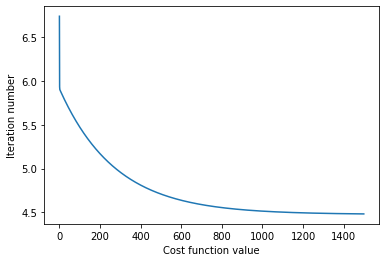

In [176]:
#zadanie11
plt.plot(cost)
plt.xlabel("Cost function value")
plt.ylabel("Iteration number")
plt.show()

In [177]:
#cześć2
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


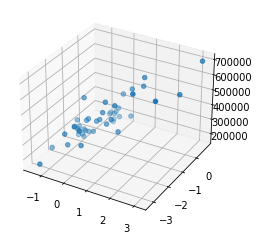

Funkcja kosztów 5.308510638297872
Optimal parameters: [[3.170201 ]
 [0.4215658]]
(array([[3.170201 ],
       [0.4215658]], dtype=float32), [5.2067423583352985, 5.106999269856446, 5.0092410717440385, 4.913428258884561, 4.8195221187117765, 4.727484727686652, 4.63727886919071, 4.548868110071361, 4.462216741515485, 4.377289720676185, 4.294052704728183, 4.21247216054847, 4.132515058220241, 4.054149111603302, 3.9773425978849932, 3.9020645921980757, 3.8282845532791945, 3.7559727887224725, 3.6850999658721584, 3.6156375810848096, 3.547557469952454, 3.4808321185576827, 3.415434643549969, 3.3513386293032483, 3.288518121252681, 3.22694762413558, 3.166602376140312, 3.1074580476813614, 3.0494907328284775, 2.9926769479110473, 2.9369937544794293, 2.882418621093766, 2.8289295416110005, 2.776504897633697, 2.725123583532344, 2.67476472234296, 2.6254079431706825, 2.5770334914818585, 2.529621689635272, 2.4831533413117852, 2.437609711437589, 2.392972387086835, 2.3492232852663744, 2.3063448786415033, 2.26431

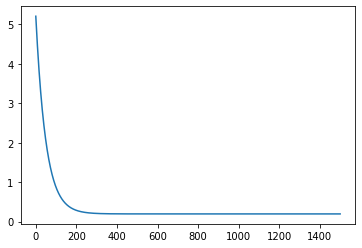

In [178]:
x = data2.values[:, 0]
y = data2.values[:, 1]
z = data2.values[:, 2]
avg_x = (x-x.mean())/x.std()
avg_y = (y-y.mean()/y.std())
avg_z = (z-z.mean()/z.std())
X = np.stack([np.ones(avg_x.shape, dtype=np.float32), avg_x], axis=0)
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0],1), dtype=np.float32)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(avg_x, avg_y, avg_z)
plt.show()

print("Funkcja kosztów",computeCost(X,y,theta))
theta, cost = simple_gradient(X,y,theta,alpha,it)
alpha = 0.01
it = 1500
th, cost = simple_gradient(X, y, theta1, alpha, it)
print("Optimal parameters:",th)
print(simple_gradient(X,y,theta1,alpha, it))

x_ = np.linspace(0,1500,1500)
plt.plot(x_, cost)
plt.show()

In [179]:

 
#3
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
 
# Data import
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit']) 
 
# Normalization
X = data.values[:, :-1]
y = data.values[:, -1]  
# Split into train and test sets (70-30%)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) 
 
# Creating an object 
regr = linear_model.LinearRegression()
 
# Learning model on training data
regr.fit(X_train, Y_train)
# Predicting values using test data
Y_predicted = regr.predict(X_test)
 
# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [1.27257944]
Residual sum of squares: 11.070735545203297
